# Завдання

Створіть свій датасет на основі випадкових даних за допомогою numpy.linspace, та проведіть на ньому лінійну регресію, використовуючи інструменти tensorflow.

# Розв'язок

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tfc.disable_eager_execution()

In [3]:
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

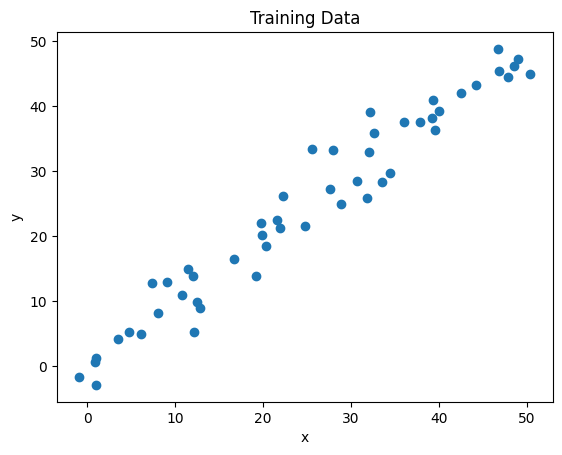

In [4]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [5]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")

In [7]:
W = tf.Variable(np.random.randn(), name = "W")

In [8]:
b = tf.Variable(np.random.randn(), name = "b")

In [9]:
y_pred = tf.add(tf.multiply(X, W), b)

In [10]:
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2)/(2 * len(x)))

In [11]:
learning_rate = 0.01
training_epochs = 1000

In [12]:
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
init = tfc.global_variables_initializer()

In [14]:
# Starting the Tensorflow Session
with tfc.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 5.4667726 W = 0.9645464 b = -0.2588477
Epoch 100 : cost = 5.426919 W = 0.9620214 b = -0.13692866
Epoch 150 : cost = 5.3955007 W = 0.9597678 b = -0.028111294
Epoch 200 : cost = 5.3707714 W = 0.95775634 b = 0.069012076
Epoch 250 : cost = 5.351332 W = 0.9559611 b = 0.1556984
Epoch 300 : cost = 5.3360853 W = 0.9543587 b = 0.23306873
Epoch 350 : cost = 5.324148 W = 0.9529286 b = 0.30212447
Epoch 400 : cost = 5.314827 W = 0.9516521 b = 0.3637597
Epoch 450 : cost = 5.307569 W = 0.9505128 b = 0.41877118
Epoch 500 : cost = 5.301938 W = 0.9494959 b = 0.46787065
Epoch 550 : cost = 5.297585 W = 0.9485884 b = 0.5116939
Epoch 600 : cost = 5.2942367 W = 0.9477783 b = 0.5508077
Epoch 650 : cost = 5.2916756 W = 0.9470553 b = 0.58571774
Epoch 700 : cost = 5.289729 W = 0.94641 b = 0.6168769
Epoch 750 : cost = 5.288265 W = 0.94583404 b = 0.64468735
Epoch 800 : cost = 5.2871747 W = 0.94532 b = 0.6695076
Epoch 850 : cost = 5.2863727 W = 0.9448612 b = 0.69166136
Epoch 900 : cost = 5.2857943

In [15]:
predictions = weight * x + bias
print("Training cost =", 
      training_cost, 
      "Weight =", weight, 
      "bias =", bias, '\n')

Training cost = 5.2851114 Weight = 0.9437599 bias = 0.74483585 



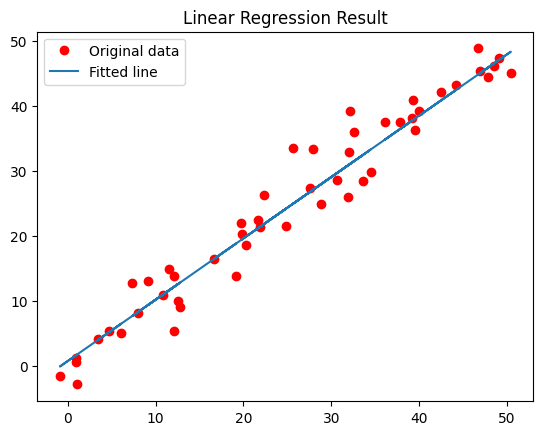

In [16]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()